In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

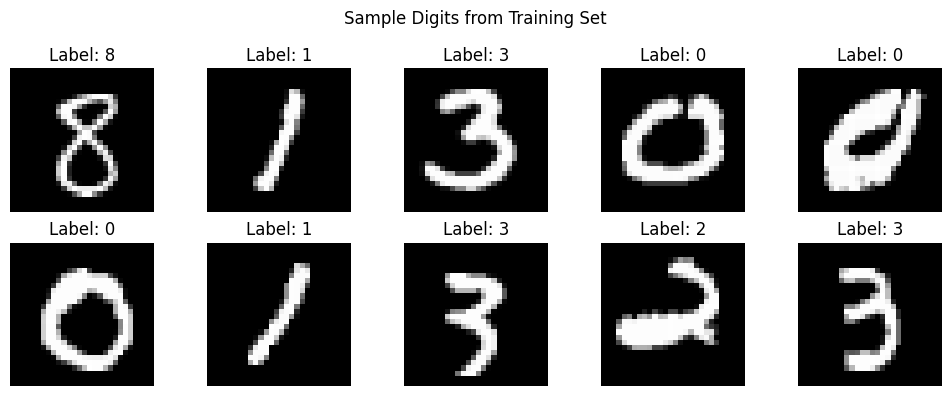

In [12]:
# Step 2: Load and Explore the MNIST Dataset
import random

plt.figure(figsize=(10, 4))
for i in range(10):
    index = random.randint(0, len(x_train))
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')
plt.suptitle("Sample Digits from Training Set")
plt.tight_layout()
plt.show()

In [4]:
# Step 3: Normalize and One-Hot Encode
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [8]:
# Step 4: Build the ANN Model
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
# Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Step 6: Train the Model
history = model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5358 - loss: 1.4563 - val_accuracy: 0.8603 - val_loss: 0.4910
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8660 - loss: 0.4675 - val_accuracy: 0.8947 - val_loss: 0.3524
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8934 - loss: 0.3573 - val_accuracy: 0.9072 - val_loss: 0.3159
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9048 - loss: 0.3250 - val_accuracy: 0.9148 - val_loss: 0.2858
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9134 - loss: 0.3018 - val_accuracy: 0.9208 - val_loss: 0.2696
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9194 - loss: 0.2782 - val_accuracy: 0.9281 - val_loss: 0.2458
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9283 - loss: 0.2473 - val_accuracy: 0.9333 - val_loss: 0.2327
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9322 - loss: 0.2312 - 

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0914 - loss: 2.3027
Test accuracy: 0.09210000187158585


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


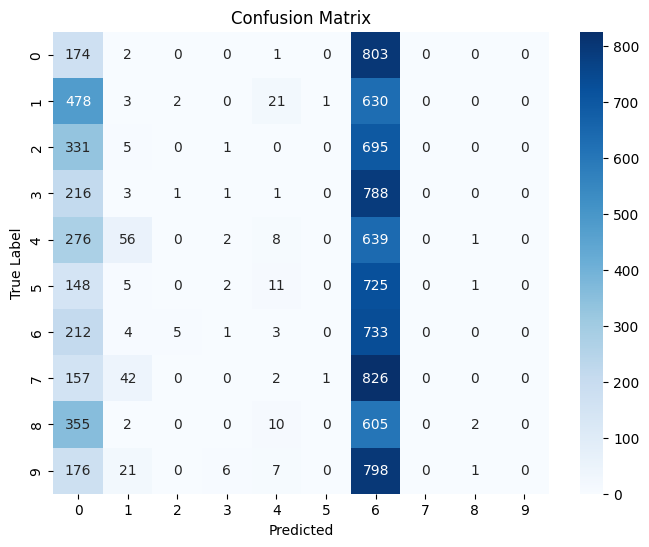

In [13]:
# Step 7: Evaluate on Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

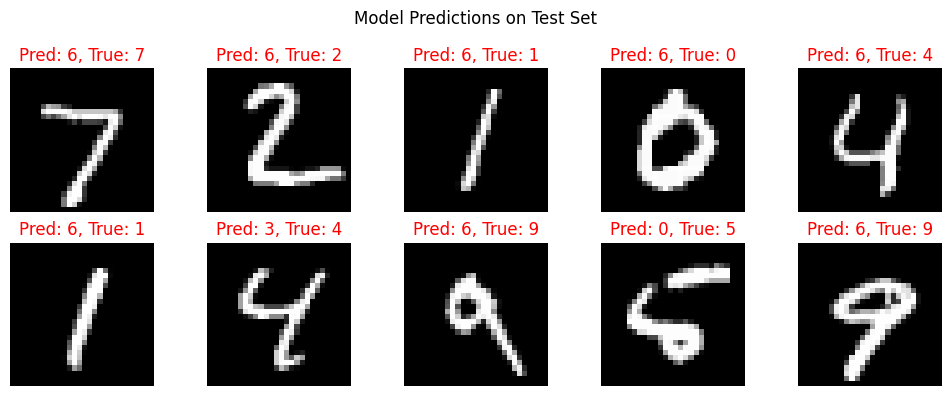

In [14]:
# Visualizing predictions vs true labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = y_pred_classes[i]
    true_label = y_test[i]
    plt.title(f"Pred: {pred_label}, True: {true_label}",
              color='green' if pred_label == true_label else 'red')
    plt.axis('off')
plt.suptitle("Model Predictions on Test Set")
plt.tight_layout()
plt.show()

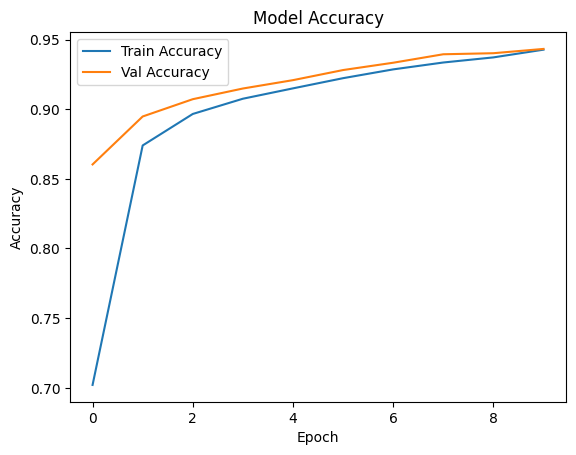

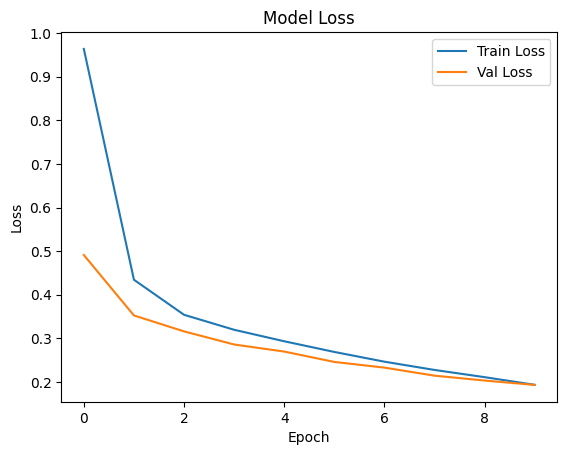

In [11]:
# Step 8: Plot Accuracy and Loss Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()